In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification, make_moons
# X, Y = make_classification(n_samples = 1000, n_features=2, n_informative=2, n_redundant=0, random_state=12, n_classes = 2, n_clusters_per_class=1)
X, Y = make_moons(n_samples = 1000, noise = 0.1)
print(X.shape, Y.shape)

(1000, 2) (1000,)


In [3]:
input_size = 2
layers = [4, 3]
output_size = 2

In [4]:
class neural_network:
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        
        self.input_size = input_size
        self.layers = layers
        self.output_size = output_size
        
        model = {}
        
        model['W' + str(1)] = np.random.randn(input_size, layers[0])
        model['b' + str(1)] = np.random.randn(1, layers[0])
        for i in range(1, len(layers)):
            model['W' + str(i+1)] = np.random.randn(layers[i-1], layers[i])
            model['b' + str(i+1)] = np.random.randn(1, layers[i])
        
        model['W' + str(len(layers)+1)] = np.random.randn(layers[-1], output_size)
        model['b' + str(len(layers)+1)] = np.random.randn(1, output_size)
        
        
        self.model = model
        
    def activation(self, z):
        return np.tanh(z)

    def forward_propagation(self, X):
        self.model["A0"] = X
        for i in range(len(self.layers)):
            A_ = self.model['A' + str(i)]
            W = self.model['W' + str(i+1)]
            b = self.model['b' + str(i+1)]
            Z = A_.dot(W) + b
            self.model['Z' + str(i+1)] = Z
            A = self.activation(Z)
            self.model['A' + str(i+1)] = A
        self.model['Z' + str(len(layers)+1)] = (self.model['A' + str(len(layers))].dot(self.model['W' + str(len(layers)+1)])) + self.model['b' + str(len(layers)+1)]
        Z_last = self.model['Z' + str(len(layers)+1)]
        self.model['output'] = np.exp(Z_last)/np.exp(Z_last).sum(axis = 1, keepdims = True)
        self.model['A' + str(len(layers)+1)] = self.model['output']
        
        return self.model['output']
    
    def loss(self, X, Y_oht):
        p = nn.forward_propagation(X)
        return np.mean(-1*Y_oht*np.log(p))

    def back_propagation(self, X, Y_oht, lr = 0.001):
        l = len(self.layers)+1
        self.model['delta'+str(l)] = self.model['A'+str(l)] - Y_oht
        a_l_m_1 = self.model['A'+str(l-1)]
        self.model['gradientW'+str(l)] = a_l_m_1.T.dot(self.model['delta'+str(l)])
        self.model['gradientb'+str(l)] = self.model['delta'+str(l)].sum(axis = 0)/self.model['delta'+str(l)].shape[0]
        
        ##
        self.model['W'+str(l)] -= lr*self.model['gradientW'+str(l)]
        self.model['b'+str(l)] -= lr*self.model['gradientb'+str(l)]
        ##
        
        i = len(layers) - 1
        while i >= 0:
            l = i+1
            delta_l_p_1 = self.model['delta'+str(l+1)]
            w_l_p_1 = self.model['W'+str(l+1)]
            Z_l = self.model['Z'+str(l)]
            self.model['delta'+str(l)] = (delta_l_p_1.dot(w_l_p_1.T)) * (1 - (np.tanh(Z_l))**2)
            
            a_l_m_1 = self.model['A'+str(l-1)]
            self.model['gradientW'+str(l)] = a_l_m_1.T.dot(self.model['delta'+str(l)])
            self.model['gradientb'+str(l)] = self.model['delta'+str(l)].sum(axis = 0)/self.model['delta'+str(l)].shape[0]
            #
            
        
            self.model['W'+str(l)] -= lr*self.model['gradientW'+str(l)]
            self.model['b'+str(l)] -= lr*self.model['gradientb'+str(l)]
        
            
            i -= 1
        
        return
    
    def fit(self, X, Y_oht, lr = 0.001, epochs = 1000):
        self.model['loss_array'] = []
        for i in range(epochs):
            y_ = self.forward_propagation(X)
            self.back_propagation(X, Y_oht, lr)
            self.model['loss_array'].append(self.loss(X, Y_oht))
        return
    
    def predict(self, X):
        y_ = self.forward_propagation(X)
        return np.argmax(y_, axis = 1)

In [5]:
nn = neural_network(input_size, layers, output_size)
for k in nn.model.keys():
    print(k, nn.model[k].shape)

W1 (2, 4)
b1 (1, 4)
W2 (4, 3)
b2 (1, 3)
W3 (3, 2)
b3 (1, 2)


In [6]:
from sklearn.preprocessing import OneHotEncoder
Y_oht = OneHotEncoder().fit_transform(Y.reshape((-1,1))).toarray()

In [7]:
def one_hot_vector(Y, n_classes):
    oht = np.zeros((Y.shape[0], n_classes))
    m = Y.shape[0]
    oht[np.arange(m), Y] = 1
    return oht

In [8]:
Y_oht = one_hot_vector(Y, output_size)

In [9]:
Y_oht

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [10]:
Y_p = nn.predict(X)
(Y_p == Y).sum()/Y.shape[0]

0.5

In [11]:
nn.fit(X, Y_oht, lr = 0.00015, epochs=5000)

In [12]:
Y_p = nn.predict(X)
(Y_p == Y).sum()/Y.shape[0]

0.999

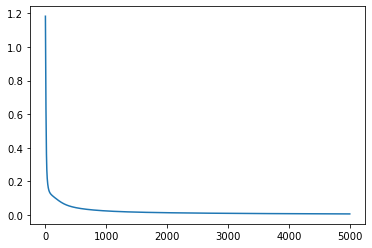

In [13]:
plt.plot(nn.model['loss_array'])
plt.show()

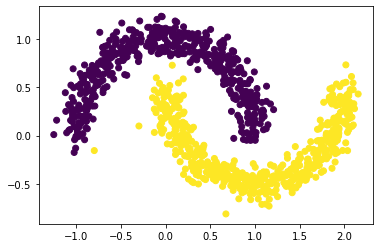

In [14]:
plt.scatter(X[:, 0], X[:, 1], c = Y_p)
plt.show()

In [15]:
#Xor dataset

In [17]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([0,1,1,0])

In [18]:
Y_oht = one_hot_vector(Y, 2)

In [19]:
input_size = 2
layers = [4, 3, 6]
output_size = 2

In [20]:
nn = neural_network(input_size, layers, output_size)
nn.fit(X, Y_oht, lr = 0.1, epochs=500)

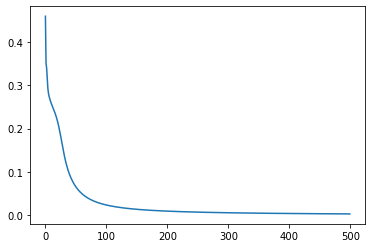

In [21]:
plt.plot(nn.model['loss_array'])
plt.show()

In [22]:
nn.predict(X)

array([0, 1, 1, 0], dtype=int64)